In [3]:
import pandas as pd
import os
from glob import glob
from natsort import natsorted
# import geopandas as gpd
from tqdm import tqdm

In [4]:
school_enroll_fname = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\highschool_school_placekey.csv"

school_enroll_df = pd.read_csv(school_enroll_fname).set_index('Placekey').fillna(0)
# school_placekeys = school_key_df['Placekey'].to_list()
school_enroll_df['total_middle_students'] = school_enroll_df['Students_6'] + school_enroll_df['Students_7'] + school_enroll_df['Students_8']
school_enroll_df['total_high_students'] = school_enroll_df['Students_9'] + school_enroll_df['Students_10'] + school_enroll_df['Students_11'] + school_enroll_df['Students_12']
school_enroll_df['total_teachers'] = school_enroll_df['Total_Students'] / school_enroll_df['Student_Teacher_Ratio']
school_enroll_df['total_phone'] =  school_enroll_df['Students_11'] + school_enroll_df['Students_12']  + school_enroll_df['Total_Students'] / school_enroll_df['Student_Teacher_Ratio']
school_enroll_df['total_people'] =  school_enroll_df['total_middle_students'] + school_enroll_df['total_high_students']  + school_enroll_df['Total_Students'] / school_enroll_df['Student_Teacher_Ratio']


# high_school_enroll_df = school_enroll_df.query("total_phone > 200 ").query("total_middle_students < 50 ")
high_school_enroll_df = school_enroll_df.query("total_phone > 0 ")#.query("total_middle_students < 50 ")

print("Loaded school placekeys:", len(school_enroll_df))
print("filtered high schools:", len(high_school_enroll_df))
school_enroll_df

C:\tmp\ipykernel_28816\822072639.py:3: DtypeWarning: Columns (2,13,29,32,33,75,76,77,87,88,89,90,91,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  school_enroll_df = pd.read_csv(school_enroll_fname).set_index('Placekey').fillna(0)


Loaded school placekeys: 31531
filtered high schools: 31531


,Nces_Id,School_Level,School_District,School_Name,School_County,Phone,Address,City,State,Zip,...,TOP_CATEGORY,SUB_CATEGORY,LATITUDE_1,LONGITUDE_1,NAICS_CODE,total_middle_students,total_high_students,total_teachers,total_phone,total_people
Placekey,,,,,,,,,,,,,,,,,,,,,
zzw-222@8gm-ms3-pn5,1.000050e+10,Secondary,Albertville City School District,Albertville High School,Marshall County,(256) 894-5000,402 E McCord Ave,Albertville,AL,35950,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.263627,-86.206532,611110,0.0,1710.0,90.957447,862.957447,1800.957447
222-222@8gm-mzc-rkz,1.000060e+10,Combined or Ungraded,Marshall County School District,Asbury High School,Marshall County,(256) 878-4068,1990 Asbury Rd,Albertville,AL,35951,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.362410,-86.141655,611110,285.0,365.0,36.312849,198.312849,686.312849
zzy-223@8gm-n94-8jv,1.000060e+10,Secondary,Marshall County School District,Douglas High School,Marshall County,(256) 593-2810,225 Eagle Drive,Douglas,AL,35964,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.178134,-86.319927,611110,0.0,691.0,33.707317,349.707317,724.707317
222-224@8gm-nwk-gkz,1.000060e+10,Secondary,Marshall County School District,Kate D Smith Dar High School,Marshall County,(256) 728-4238,6077 Main St,Grant,AL,35747,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.533644,-86.254083,611110,0.0,397.0,23.491124,220.491124,420.491124
zzw-222@8gm-p3m-z9f,1.000060e+10,Combined or Ungraded,Marshall County School District,Brindlee Mountain High School,Marshall County,(256) 753-2800,994 Scant City Road,Guntersville,AL,35976,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.376460,-86.421873,611110,213.0,302.0,34.105960,166.105960,549.105960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzw-222@5z8-f95-3qz,0.000000e+00,Combined or Ungraded,0,Coastal Christian School,San Luis Obispo County,(805) 489-1213,1005 Oak Park Blvd,Pismo Beach,CA,93449,...,Elementary and Secondary Schools,Elementary and Secondary Schools,35.137682,-120.605958,611110,77.0,73.0,20.470588,49.470588,170.470588
223-223@8t2-fkh-fj9,0.000000e+00,Combined or Ungraded,0,Hyde Park School,Travis County,(512) 465-8338,3901 Speedway Dr,Austin,TX,78751,...,Elementary and Secondary Schools,Elementary and Secondary Schools,30.302155,-97.731914,611110,211.0,280.0,84.111111,221.111111,575.111111
223-223@5py-nkk-hnq,0.000000e+00,Combined or Ungraded,0,Sayre School,Fayette County,(859) 254-1361,194 N Limestone,Lexington,KY,40507,...,Elementary and Secondary Schools,Elementary and Secondary Schools,38.047527,-84.493717,611110,104.0,252.0,75.750000,203.750000,431.750000


In [5]:
# load state info
import geopandas as gpd
state_fname = r'https://github.com/gladcolor/spatial_data/raw/refs/heads/master/cb_2019_us_state_20m.zip'
state_gdf = gpd.read_file(state_fname)
state_gdf.rename(columns={'NAME':'STATE_NAME'}, inplace=True)


county_fname = r'https://github.com/gladcolor/spatial_data/raw/refs/heads/master/cb_2019_us_county_20m.zip'
county_gdf = gpd.read_file(county_fname)
county_gdf['county_FIPS'] = county_gdf['STATEFP'] + county_gdf['COUNTYFP']
county_gdf.rename(columns={'NAME':'COUNTY_NAME'}, inplace=True)

county_gdf = county_gdf.merge(state_gdf[['STATEFP','STATE_NAME', 'STUSPS']], on='STATEFP', how='left', validate='m:1', indicator=True)
# validate='m:1' asserts each county matches at most one state (many counties to one state); if the source breaks that, merge raises an error instead of silently duplicating rows. Huan: doesn't seem to happen here.
# indicator=True adds a _merge column showing whether the state match came from both dataframes or not, handy for spotting counties that failed to match.
county_gdf

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,COUNTY_NAME,LSAD,ALAND,AWATER,geometry,county_FIPS,STATE_NAME,STUSPS,_merge
0,29,227,00758566,0500000US29227,29227,Worth,06,690564983,493903,"POLYGON ((-94.63203 40.57176, -94.53388 40.570...",29227,Missouri,MO,both
1,31,061,00835852,0500000US31061,31061,Franklin,06,1491355860,487899,"POLYGON ((-99.1794 40.35068, -98.72683 40.3504...",31061,Nebraska,NE,both
2,36,013,00974105,0500000US36013,36013,Chautauqua,06,2746047476,1139407865,"POLYGON ((-79.76195 42.26986, -79.62748 42.324...",36013,New York,NY,both
3,37,181,01008591,0500000US37181,37181,Vance,06,653713542,42178610,"POLYGON ((-78.49773 36.51467, -78.45728 36.541...",37181,North Carolina,NC,both
4,47,183,01639799,0500000US47183,47183,Weakley,06,1503107848,3707114,"POLYGON ((-88.94916 36.4101, -88.81642 36.4107...",47183,Tennessee,TN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,40,091,01101836,0500000US40091,40091,McIntosh,06,1601359179,242867678,"POLYGON ((-95.98151 35.28978, -95.98146 35.376...",40091,Oklahoma,OK,both
3216,40,095,01101832,0500000US40095,40095,Marshall,06,962443215,143430766,"POLYGON ((-96.96842 34.17268, -96.9335 34.1727...",40095,Oklahoma,OK,both
3217,48,225,01383898,0500000US48225,48225,Houston,06,3188278910,14435337,"POLYGON ((-95.7287 31.16406, -95.72523 31.2710...",48225,Texas,TX,both
3218,48,407,01383989,0500000US48407,48407,San Jacinto,06,1474332268,151949233,"POLYGON ((-95.32748 30.85955, -95.25238 30.906...",48407,Texas,TX,both


In [5]:
# sorted(county_gdf['GEOID'].unique())

In [6]:
# load all_weeks_highschools_2022.parquet to duckdb
import duckdb
import random

school_fname = r"D:\Data\Advan\Weekly_Patterns\extracted_schools_2022\all_weeks_highschools_2022.parquet"


con = duckdb.connect()

con.execute(f"""
    CREATE TABLE highschools AS
    SELECT * FROM read_parquet('{school_fname}')
""")

# get the row count
con.execute(f"""
    SELECT COUNT(*) FROM highschools
""")
row_count = con.fetchone()[0]
print(f"Row count: {row_count}")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Row count: 1513203


In [7]:
# pick a random 100 rows
import random
needed_cnt = 100
offset = random.randint(0, row_count - needed_cnt)

# con = duckdb.connect()
con.execute(f"""            
    SELECT * FROM highschools
    LIMIT {needed_cnt} offset {offset};
""")
# visits_df = con.fetchdf()
# visits_df

In [8]:
# show all school hourly visits columns

# get all school placekeys
con.execute(f"""
    SELECT DISTINCT placekey FROM highschools
            WHERE raw_visitor_counts > 0
""")
all_school_keys = con.fetchall()
all_school_keys = [k[0] for k in all_school_keys]
print(f"Total unique school placekeys: {len(all_school_keys)}")

Total unique school placekeys: 28298


In [12]:
high_school_enroll_df = high_school_enroll_df[high_school_enroll_df.index.isin(all_school_keys) ]
high_school_enroll_df

,Nces_Id,School_Level,School_District,School_Name,School_County,Phone,Address,City,State,Zip,...,TOP_CATEGORY,SUB_CATEGORY,LATITUDE_1,LONGITUDE_1,NAICS_CODE,total_middle_students,total_high_students,total_teachers,total_phone,total_people
Placekey,,,,,,,,,,,,,,,,,,,,,
zzw-222@8gm-ms3-pn5,1.000050e+10,Secondary,Albertville City School District,Albertville High School,Marshall County,(256) 894-5000,402 E McCord Ave,Albertville,AL,35950,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.263627,-86.206532,611110,0.0,1710.0,90.957447,862.957447,1800.957447
222-222@8gm-mzc-rkz,1.000060e+10,Combined or Ungraded,Marshall County School District,Asbury High School,Marshall County,(256) 878-4068,1990 Asbury Rd,Albertville,AL,35951,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.362410,-86.141655,611110,285.0,365.0,36.312849,198.312849,686.312849
zzy-223@8gm-n94-8jv,1.000060e+10,Secondary,Marshall County School District,Douglas High School,Marshall County,(256) 593-2810,225 Eagle Drive,Douglas,AL,35964,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.178134,-86.319927,611110,0.0,691.0,33.707317,349.707317,724.707317
222-224@8gm-nwk-gkz,1.000060e+10,Secondary,Marshall County School District,Kate D Smith Dar High School,Marshall County,(256) 728-4238,6077 Main St,Grant,AL,35747,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.533644,-86.254083,611110,0.0,397.0,23.491124,220.491124,420.491124
zzw-222@8gm-p3m-z9f,1.000060e+10,Combined or Ungraded,Marshall County School District,Brindlee Mountain High School,Marshall County,(256) 753-2800,994 Scant City Road,Guntersville,AL,35976,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.376460,-86.421873,611110,213.0,302.0,34.105960,166.105960,549.105960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzw-222@5z8-f95-3qz,0.000000e+00,Combined or Ungraded,0,Coastal Christian School,San Luis Obispo County,(805) 489-1213,1005 Oak Park Blvd,Pismo Beach,CA,93449,...,Elementary and Secondary Schools,Elementary and Secondary Schools,35.137682,-120.605958,611110,77.0,73.0,20.470588,49.470588,170.470588
223-223@8t2-fkh-fj9,0.000000e+00,Combined or Ungraded,0,Hyde Park School,Travis County,(512) 465-8338,3901 Speedway Dr,Austin,TX,78751,...,Elementary and Secondary Schools,Elementary and Secondary Schools,30.302155,-97.731914,611110,211.0,280.0,84.111111,221.111111,575.111111
223-223@5py-nkk-hnq,0.000000e+00,Combined or Ungraded,0,Sayre School,Fayette County,(859) 254-1361,194 N Limestone,Lexington,KY,40507,...,Elementary and Secondary Schools,Elementary and Secondary Schools,38.047527,-84.493717,611110,104.0,252.0,75.750000,203.750000,431.750000


In [ ]:
import gc
import matplotlib.pyplot as plt
import pandas as pd
import ast
import random
import matplotlib.dates as mdates


save_dir = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\Figures\school_weekly_plots_v2"
os.makedirs(save_dir, exist_ok=True)

# --- Step 1. Expand visits_by_each_hour to hourly ---
def get_hourly_visits_in_a_row(row):
    start = pd.to_datetime(row['date_range_start'], errors='coerce')  # , utc=True
    end   = pd.to_datetime(row['date_range_end'], errors='coerce')
    hours = pd.date_range(start=start, end=end, freq='h', inclusive="left")
    visits = ast.literal_eval(row['visits_by_each_hour'])
    return pd.DataFrame({'hour_local': hours, 'visits': visits})

# --- Step 3. Plotting helper ---
def overlay_weekly_lines(ax, df_weeks, hours_s, title, month=None, year=None):
    # if monthly: trim weekly lines to month boundaries
    if month is not None and year is not None:
        month_start = pd.Timestamp(year=year, month=month, day=1, tz='UTC')
        # end = last day of month + 1 day at 00:00 (exclusive bound)
        month_end   = (month_start + pd.offsets.MonthEnd(1))  + pd.Timedelta(days=1)
    else:
        month_start, month_end = None, None

    for i, row in df_weeks.iterrows():  # each row is a week
        start = row['date_range_start']
        end   = row['date_range_end']
        # trim to month bounds if provided
        if month_start is not None:
            start = max(start, month_start)
            end   = min(end, month_end)
            # print(f"Trimmed week {i} to {start} - {end}")
            if start >= end:
                continue
        ax.hlines(
            y=row['raw_visitor_counts'],
            xmin=start,
            xmax=end,
            colors='tab:orange',
            linewidth=2,
            linestyle='--',
            label='raw_visitor_counts' if i == df_weeks.index[0] else ""
        )

    # plot hourly visits
    ax.plot(hours_s.index, hours_s.values, color='tab:blue', alpha=0.7, label='hourly visits')
    ax.set_title(title)
    ax.set_ylabel("count")
    ax.legend(loc="upper left")

    # format x-axis for monthly panels: show only day and hour
    if month is not None:
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
        for label in ax.get_xticklabels():
            label.set_rotation(0)

for placekey in tqdm(all_school_keys[:], total=len(all_school_keys)):  
    # --- Step 2. Prep one school’s data ---
    # placekey = random.choice(all_school_keys)
    # placekey = 'zzw-223@8g7-2pc-d5f'
    try:
        con.execute(f"""
            SELECT *
            FROM highschools
            WHERE placekey = '{placekey}'
        """)
        school_df = con.fetchdf()
        school_df['poi_cbg'] = school_df['poi_cbg'].str.replace(".0", "").str.zfill(12)
        school_name = school_df.iloc[0]['location_name']
        county_FIPS = school_df.iloc[0]['poi_cbg'][:5]
        # county_name = county_gdf.loc[county_gdf['county_FIPS']==county_FIPS, 'COUNTY_NAME'].values[0]
        # State_name = county_gdf.loc[county_gdf['county_FIPS']==county_FIPS, 'STATE_NAME'].values[0]
        try:
            State_name = county_gdf.loc[county_gdf['county_FIPS']==county_FIPS, 'STATE_NAME'].values[0]
        except IndexError:
            State_name = ""
            print("State name not found for STATEFP:", county_FIPS)

        try:
            county_name = county_gdf.loc[county_gdf['county_FIPS']==county_FIPS, 'COUNTY_NAME'].values[0]
        except IndexError:
            county_name = ""
            print("County name not found for COUNTYFP:", county_FIPS)


        school_df = school_df[school_df['visits_by_each_hour'].notna()].copy()
        school_df['date_range_start'] = pd.to_datetime(school_df['date_range_start'], utc=True, errors='coerce')
        school_df['date_range_end']   = pd.to_datetime(school_df['date_range_end'],   utc=True, errors='coerce')

        # Keep only 2022
        school_df = school_df[school_df['date_range_start'].dt.year == 2022].copy()

        # Expand hourly visits
        hourly_dfs = school_df.apply(get_hourly_visits_in_a_row, axis=1).to_list()
        school_hourly_df = pd.concat(hourly_dfs, ignore_index=True)
        school_hourly_df = school_hourly_df[school_hourly_df['hour_local'].dt.year == 2022]

        # Series for hourly visits
        annual_hours  = school_hourly_df.set_index('hour_local')['visits']

        # --- Step 4. Figure layout ---
        fig = plt.figure(figsize=(24, 20))
        gs = fig.add_gridspec(5, 3)  # 1 row annual + 4 rows monthly

        # Annual plot spanning all 3 columns
        ax_annual = fig.add_subplot(gs[0, :])
        overlay_weekly_lines(ax_annual, school_df, annual_hours,
            f"Annual: Hourly visits. School: {school_name}, {county_name}, {State_name}")

        # Monthly plots
        for m in range(1, 13):
            row = (m-1)//3 + 1
            col = (m-1)%3
            ax = fig.add_subplot(gs[row, col])

            df_month = school_df[
                school_df['date_range_start'].dt.month == m # &
                # (school_df['date_range_end'].dt.month >= m)
            ]
            hours_m  = school_hourly_df[school_hourly_df['hour_local'].dt.month == m].set_index('hour_local')['visits']

            if df_month.empty and hours_m.empty:
                ax.set_title(f"Month {m} (no data)")
                ax.axis('off')
            else:
                overlay_weekly_lines(ax, df_month, hours_m, f"Month {m}", month=m, year=2022)

        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f"{State_name}_{county_name}_{school_name}_{placekey}.png"))
        # plt.show()
        plt.clf()
        plt.close(fig)
        plt.close('all')
        del school_df, school_hourly_df, annual_hours, hourly_dfs, fig, hours_m, df_month, ax_annual, gs, ax
        gc.collect()
        # break
        
    except Exception as e:
        print(f"Error processing placekey {placekey}: {e}")
        continue


  0%|          | 0/28298 [00:01<?, ?it/s]


# Show monthly visits

In [11]:
parquet_fname = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\merged_highschools_2022.parquet'
monthly_all_df = pd.read_parquet(parquet_fname)
monthly_all_df

,BRANDS,BUCKETED_DWELL_TIMES,CATEGORY_TAGS,CITY,CLOSED_ON,DATE_RANGE_END,DATE_RANGE_START,DEVICE_TYPE,DISTANCE_FROM_HOME,ENCLOSED,...,SUB_CATEGORY,TOP_CATEGORY,TRACKING_CLOSED_SINCE,VISITOR_COUNTRY_OF_ORIGIN,VISITOR_DAYTIME_CBGS,VISITOR_HOME_AGGREGATION,VISITOR_HOME_CBGS,VISITS_BY_DAY,WEBSITES,WKT_AREA_SQ_METERS
0,None,"""{ \""<5\"":1, \""5-20\"":0, \""21-60\"":0, \""61-240...",None,Hayward,None,2022-02-01 00:00:00.000,2022-01-01 00:00:00.000,None,NaN,False,...,All Other Miscellaneous Schools and Instruction,Other Schools and Instruction,2019-07-01,None,None,None,None,"""[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",spectrumschools.com,1004.0
1,None,"""{ \""<5\"":6, \""5-20\"":0, \""21-60\"":2, \""61-240...",None,Fairfield,None,2022-02-01 00:00:00.000,2022-01-01 00:00:00.000,"""{\""ios\"":4}""",20841.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":4}""",None,None,None,"""[0,0,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,...",None,4151.0
2,None,"""{ \""<5\"":2, \""5-20\"":0, \""21-60\"":1, \""61-240...",None,Colton,None,2022-02-01 00:00:00.000,2022-01-01 00:00:00.000,"""{\""ios\"":4}""",8336.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":4}""",None,None,None,"""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...",None,426.0
3,None,"""{ \""<5\"":1, \""5-20\"":0, \""21-60\"":0, \""61-240...",None,Mayfield,None,2022-02-01 00:00:00.000,2022-01-01 00:00:00.000,"""{\""ios\"":4}""",33154.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":4}""",None,None,None,"""[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",None,735.0
4,None,"""{ \""<5\"":5, \""5-20\"":0, \""21-60\"":0, \""61-240...",None,Anchorage,None,2022-02-01 00:00:00.000,2022-01-01 00:00:00.000,"""{\""android\"":4}""",1814.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":4}""",None,None,None,"""[0,0,1,1,1,2,2,0,2,2,1,1,2,1,0,0,1,1,1,1,1,0,...",None,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342637,None,"""{ \""<5\"":26, \""5-20\"":4, \""21-60\"":3, \""61-24...",None,Glenmoore,None,2023-01-01 00:00:00.000,2022-12-01 00:00:00.000,"""{\""ios\"":10,\""android\"":9}""",17880.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,None,"""{\""US\"":19}""","""{\""420293017001\"":4,\""420293049002\"":4}""","""{\""42029301700\"":4,\""42029304900\"":4}""","""{\""420293049002\"":4,\""420293017001\"":4}""","""[4,6,0,0,5,6,6,6,4,0,0,1,2,5,2,3,0,1,5,4,3,4,...",camphillspecialschool.org,5768.0
342638,None,"""{ \""<5\"":32, \""5-20\"":0, \""21-60\"":2, \""61-24...",None,Chicago,None,2023-01-01 00:00:00.000,2022-12-01 00:00:00.000,"""{\""android\"":11,\""ios\"":10}""",2134.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,None,"""{\""US\"":21}""","""{\""170316709002\"":4}""","""{\""17031671600\"":4,\""17031670900\"":4,\""170318...","""{\""170316709002\"":4,\""170318349001\"":4,\""1703...","""[2,2,1,1,6,5,2,2,3,0,0,5,4,5,3,3,2,1,3,3,3,2,...",None,776.0
342639,None,"""{ \""<5\"":39, \""5-20\"":2, \""21-60\"":5, \""61-24...",None,Chicago,None,2023-01-01 00:00:00.000,2022-12-01 00:00:00.000,"""{\""android\"":15,\""ios\"":8}""",2445.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,None,"""{\""US\"":23}""","""{\""170312713001\"":4}""","""{\""17031271300\"":6,\""17031271200\"":4}""","""{\""170312713001\"":6,\""170312712001\"":4}""","""[3,4,1,0,5,5,4,6,3,0,0,4,5,3,4,5,2,1,4,4,4,2,...",None,2821.0
342640,None,"""{ \""<5\"":32, \""5-20\"":7, \""21-60\"":6, \""61-24...",None,Ukiah,None,2023-01-01 00:00:00.000,2022-12-01 00:00:00.000,"""{\""ios\"":13,\""android\"":12}""",4435.0,False,...,Other Technical and Trade Schools,Technical and Trade Schools,None,"""{\""US\"":25}""","""{\""060450113001\"":4,\""060450113002\"":4,\""0604...","""{\""06045011600\"":5,\""06045011300\"":

In [12]:
monthly_all_df.set_index('PLACEKEY', inplace=True)

In [17]:
monthly_all_df.sort_values(by=['DATE_RANGE_START'], inplace=True)
monthly_all_df['DATE_RANGE_START'] = pd.to_datetime(monthly_all_df['DATE_RANGE_START'], utc=True, errors='coerce')
monthly_all_df['DATE_RANGE_END']   = pd.to_datetime(monthly_all_df['DATE_RANGE_END'],   utc=True, errors='coerce')

In [ ]:
def get_daily_visits(row):    
    visits_by_day = ast.literal_eval(row['VISITS_BY_DAY'])
    # print("visits:", type(visits_by_day), visits_by_day)
    # get the last day of a month (yyyy-mm)
    first_day = pd.to_datetime(row['DATE_RANGE_START']) 
    last_day = first_day + pd.DateOffset(days=len(visits_by_day)) - pd.DateOffset(days=1)
    date_range = pd.date_range(start=first_day, end=last_day, freq='D')
    visits_by_day = pd.DataFrame({'day': date_range, 'visits': visits_by_day})
    visits_by_day['visits'] = visits_by_day['visits'].astype(int)
    visits_by_day['RAW_VISITOR_COUNTS'] = row['RAW_VISITOR_COUNTS']

    # print("visits length:", len(visits_by_day), first_day )

    return visits_by_day


for placekey in tqdm(all_school_keys[:]):
    
    try:

        school_df = monthly_all_df.loc[placekey].copy()
        if school_df.empty:
            continue
        school_df = school_df.dropna(subset=['VISITS_BY_DAY'])
        if len(school_df) == 0:
            continue
        school_df = school_df.dropna(subset=['VISITS_BY_DAY'])
        placename = school_df['LOCATION_NAME'].values[0]
        # print(placename, placekey)
        
        df_list = []
        for index, row in school_df.iterrows():
            daily_visits = get_daily_visits(row)
            df_list.append(daily_visits)

        daily_visits_df = pd.concat(df_list) 
        daily_visits_df['visits'] = daily_visits_df['visits'].astype(int)
        daily_visits_df = daily_visits_df.set_index('day')
        daily_visits_df = daily_visits_df.sort_index()

        # Step 1: Create complete date range
        full_index = pd.date_range(start=daily_visits_df.index.min(), end=daily_visits_df.index.max(), freq='D')

        # Step 2: Reindex to include all days (missing days become NaN)
        daily_visits_df = daily_visits_df.reindex(full_index)

        # Step 3: Convert 0s to NaN so they don’t plot
        fig, ax = plt.subplots(figsize=(24, 6))
        daily_visits_df = daily_visits_df.where(daily_visits_df > -1)

        # monthly_median = daily_visits_df.resample('ME').median()
        # get the 90 percentile for each month
        monthly_median = daily_visits_df.resample('ME').quantile(0.65, interpolation='nearest')

        daily_visits_df['RAW_VISITOR_COUNTS'] = daily_visits_df['RAW_VISITOR_COUNTS']  
        daily_visits_df.plot(ax=ax)
        total_phone = high_school_enroll_df.query(f"Placekey == '{placekey}'").iloc[0]['total_phone']  
        ax.axhline(y=total_phone, color='black', linestyle='--', label='Total people')
        ax.set_title("Daily visits for: " + placename)

    # Step 4: Plot
        
        
        # plot the county panel data
        # county_FIPS = random_school['countyFIPS'].values[0]
        school_visits_df = monthly_all_df.loc[placekey].copy()
        school_visits_df['countyFIPS'] = school_visits_df['POI_CBG'].astype(str).str.zfill(12).str[:5]
        county_FIPS = school_visits_df['countyFIPS'].values[0]
        state_FIPS = county_FIPS[:2]
        # state_FIPS = random_school['stateFIPS'].values[0]

        # get panel data for the county
        school_county_panel_df = county_panel_df.query(f"county_FIPS == '{county_FIPS}' ")
    
        # draw a horizontal line at the median for each month
        for date, row in monthly_median.iterrows():
            # get the first day of the month
            start = date.to_period('M').start_time   # or: start = date.replace(day=1)
            end = date
            ax.hlines(row['visits'], xmin=start, xmax=end,
                    colors='red', linestyles='--', linewidth=1)
            
            # draw monthly panel
            panel_device_count = school_county_panel_df.query(f"year_month >= '{start.date()}' and year_month <= '{end.date()}' ")['NUMBER_DEVICES_RESIDING'].median()
            # print("Monthly panel device count:", start, end, panel_device_count)
            ax.hlines(panel_device_count / 200, xmin=start, xmax=end,
                    colors='green', linestyles='--', linewidth=1)
            
        ax.hlines(row['visits'], xmin=start, xmax=end,
                    colors='red', linestyles='--', linewidth=1, label='School Monthly Weekday Median')
        ax.hlines(panel_device_count / 200, xmin=start, xmax=end,
                    colors='green', linestyles='--', linewidth=1, label='County Monthly Panel Device Count')

        # county_panel_df = county_panel_df.set_index('date')
        limits = ax.get_xlim()
        # draw the state panel data

        state_df = monthly_panel_df[['TOTAL_DEVICES_SEEN', 'date', 'STATEFP']].query(f"STATEFP == '{state_FIPS}'").set_index('date').sort_index()
        state_df['TOTAL_DEVICES_SEEN'] = state_df['TOTAL_DEVICES_SEEN'] / 1000
        state_df['TOTAL_DEVICES_SEEN'].plot(ax=ax, label='State Monthly Panel Device Count')
        ax.set_xlim(limits)

        ax.legend()
        state_name = monthly_panel_df.query(f"STATEFP == '{state_FIPS}'")['NAME'].values[0]
        county_name = county_gdf.query(f"county_FIPS == '{county_FIPS}'")['COUNTY_NAME'].iloc[0] 
        ax.set_title(f"Daily visits for: {placename} in {county_name}, {state_name}")
        fname = os.path.join(save_dir, f'{state_name}_{county_name}_{county_FIPS}_{placekey}.png')
        # plt.savefig(fname)
        plt.show()
        plt.close()
        break
    except Exception as e:
        tb = traceback.extract_tb(e.__traceback__)[-1]
        print(f"Error processing placekey: {placekey} @ {tb.filename}:{tb.lineno} – {type(e).__name__}: {e}")
        # print("school_df:\n", school_df)
        continue
        
daily_visits_df.resample('ME').median().dropna()

In [ ]:
school_month = monthly_all_df.loc[placekey].copy()

def get_daily_visits(row):    
    visits_by_day = ast.literal_eval(row['VISITS_BY_DAY'])
    # print("visits:", type(visits_by_day), visits_by_day)
    # get the last day of a month (yyyy-mm)
    first_day = pd.to_datetime(row['DATE_RANGE_START']) 
    last_day = first_day + pd.DateOffset(days=len(visits_by_day)) - pd.DateOffset(days=1)
    date_range = pd.date_range(start=first_day, end=last_day, freq='D')
    visits_by_day = pd.DataFrame({'day': date_range, 'visits': visits_by_day})
    visits_by_day['visits'] = visits_by_day['visits'].astype(int)
    visits_by_day['RAW_VISITOR_COUNTS'] = row['RAW_VISITOR_COUNTS']

    # print("visits length:", len(visits_by_day), first_day )

    return visits_by_day

# explode the VISITS_BY_DAY column
for idx, row in school_month.iterrows():
    visits_by_day = ast.literal_eval(row['VISITS_BY_DAY'])
    dates = pd.date_range(start=row['DATE_RANGE_START'], end=row['DATE_RANGE_END'] - pd.Timedelta(days=1), freq='D')
    df_expanded = pd.DataFrame({'date': dates, 'visits': visits_by_day})
    school_month.at[idx, 'expanded_visits'] = df_expanded

    break
school_month

,BRANDS,BUCKETED_DWELL_TIMES,CATEGORY_TAGS,CITY,CLOSED_ON,DATE_RANGE_END,DATE_RANGE_START,DEVICE_TYPE,DISTANCE_FROM_HOME,ENCLOSED,...,SUB_CATEGORY,TOP_CATEGORY,TRACKING_CLOSED_SINCE,VISITOR_COUNTRY_OF_ORIGIN,VISITOR_DAYTIME_CBGS,VISITOR_HOME_AGGREGATION,VISITOR_HOME_CBGS,VISITS_BY_DAY,WEBSITES,WKT_AREA_SQ_METERS
PLACEKEY,,,,,,,,,,,,,,,,,,,,,
zzw-222@8g7-2mf-nh5,None,"""{ \""<5\"":93, \""5-20\"":11, \""21-60\"":10, \""61-...",None,Lawrenceville,None,2022-02-01 00:00:00+00:00,2022-01-01 00:00:00+00:00,"""{\""ios\"":49,\""android\"":44}""",10745.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":93}""","""{\""131350505432\"":4,\""131350506072\"":4,\""1313...","""{\""13135050544\"":8,\""13135050543\"":7,\""131350...","""{\""131350505432\"":7,\""131350505441\"":7,\""1313...","""[0,2,0,0,19,28,24,0,0,27,32,28,29,27,0,0,0,30...",None,16748.0
zzw-222@8g7-2mf-nh5,None,"""{ \""<5\"":85, \""5-20\"":19, \""21-60\"":18, \""61-...",None,Lawrenceville,None,2022-03-01 00:00:00+00:00,2022-02-01 00:00:00+00:00,"""{\""android\"":49,\""ios\"":47}""",8419.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":96}""","""{\""131350505432\"":4,\""131350506072\"":4,\""1313...","""{\""13135050544\"":9,\""13135050543\"":7,\""131350...","""{\""131350505441\"":9,\""131350505432\"":7,\""1313...","""[27,26,30,32,2,0,25,36,31,31,37,0,0,27,27,33,...",None,16748.0
zzw-222@8g7-2mf-nh5,None,"""{ \""<5\"":131, \""5-20\"":24, \""21-60\"":39, \""61...",None,Lawrenceville,None,2022-04-01 00:00:00+00:00,2022-03-01 00:00:00+00:00,"""{\""ios\"":77,\""android\"":63}""",11254.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":140}""","""{\""131350505212\"":7,\""131350505441\"":4,\""1313...","""{\""13135050544\"":12,\""13135050521\"":12,\""1313...","""{\""131350505441\"":11,\""131350505212\"":8,\""131...","""[32,33,33,35,0,1,27,35,37,39,42,0,2,2,35,39,4...",None,16748.0
zzw-222@8g7-2mf-nh5,None,"""{ \""<5\"":115, \""5-20\"":15, \""21-60\"":26, \""61...",None,Lawrenceville,None,2022-05-01 00:00:00+00:00,2022-04-01 00:00:00+00:00,"""{\""ios\"":79,\""android\"":59}""",9358.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":138}""","""{\""131350505441\"":7,\""131350505221\"":4,\""1313...","""{\""13135050544\"":15,\""13135050521\"":12,\""1313...","""{\""131350505441\"":13,\""131350505432\"":6,\""131...","""[38,0,0,1,1,2,1,1,3,0,40,37,43,37,48,2,0,38,3...",None,16748.0
zzw-222@8g7-2mf-nh5,None,"""{ \""<5\"":160, \""5-20\"":31, \""21-60\"":34, \""61...",None,Lawrenceville,None,2022-06-01 00:00:00+00:00,2022-05-01 00:00:00+00:00,"""{\""ios\"":99,\""android\"":81}""",6785.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":178}""","""{\""131350505432\"":10,\""131350505212\"":6,\""131...","""{\""13135050543\"":22,\""13135050521\"":18,\""1313...","""{\""131350505432\"":22,\""131350505441\"":13,\""13...","""[0,36,34,38,36,36,0,0,31,39,40,44,43,0,0,39,4...",None,16748.0
zzw-222@8g7-2mf-nh5,None,"""{ \""<5\"":69, \""5-20\"":21, \""21-60\"":14, \""61-...",None,Lawrenceville,None,2022-07-01 00:00:00+00:00,2022-06-01 00:00:00+00:00,"""{\""ios\"":51,\""android\"":29}""",13161.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":80}""","""{\""131350505432\"":4,\""131350507091\"":4,\""1313...","""{\""13135050544\"":6,\""13135050607\"":5,\""131350...","""{\""131350505441\"":4,\""131350505432\"":4,\""1313...","""[9,9,6,0,0,12,8,9,9,4,0,0,22,16,18,21,21,0,0,...",None,16748.0
zzw-222@8g7-2mf-nh5,None,"""{ \""<5\"":60, \""5-20\"":16, \""21-60\"":26, \""61-...",None,Lawrenceville,None,2022-08-01 00:00:00+00:00,2022-07-01 00:00:00+00:00,"""{\""ios\"":67,\""android\"":50}""",12907.0,False,...,Elementary and Secondary Schools,Elementary and Secondary Schools,2019-07-01,"""{\""US\"":117}""","""{\""1313505054

In [ ]:
STOP

NameError: name 'STOP' is not defined

  0%|          | 0/16503 [00:00<?, ?it/s]

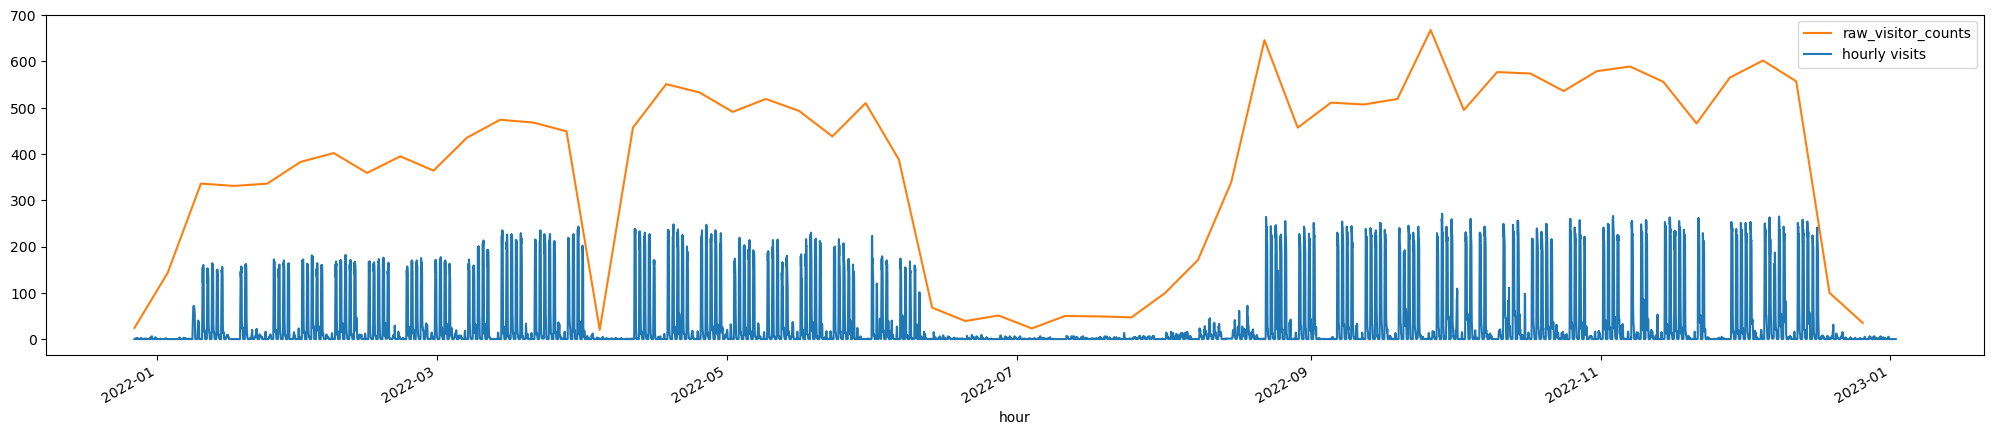

  0%|          | 0/16503 [00:01<?, ?it/s]


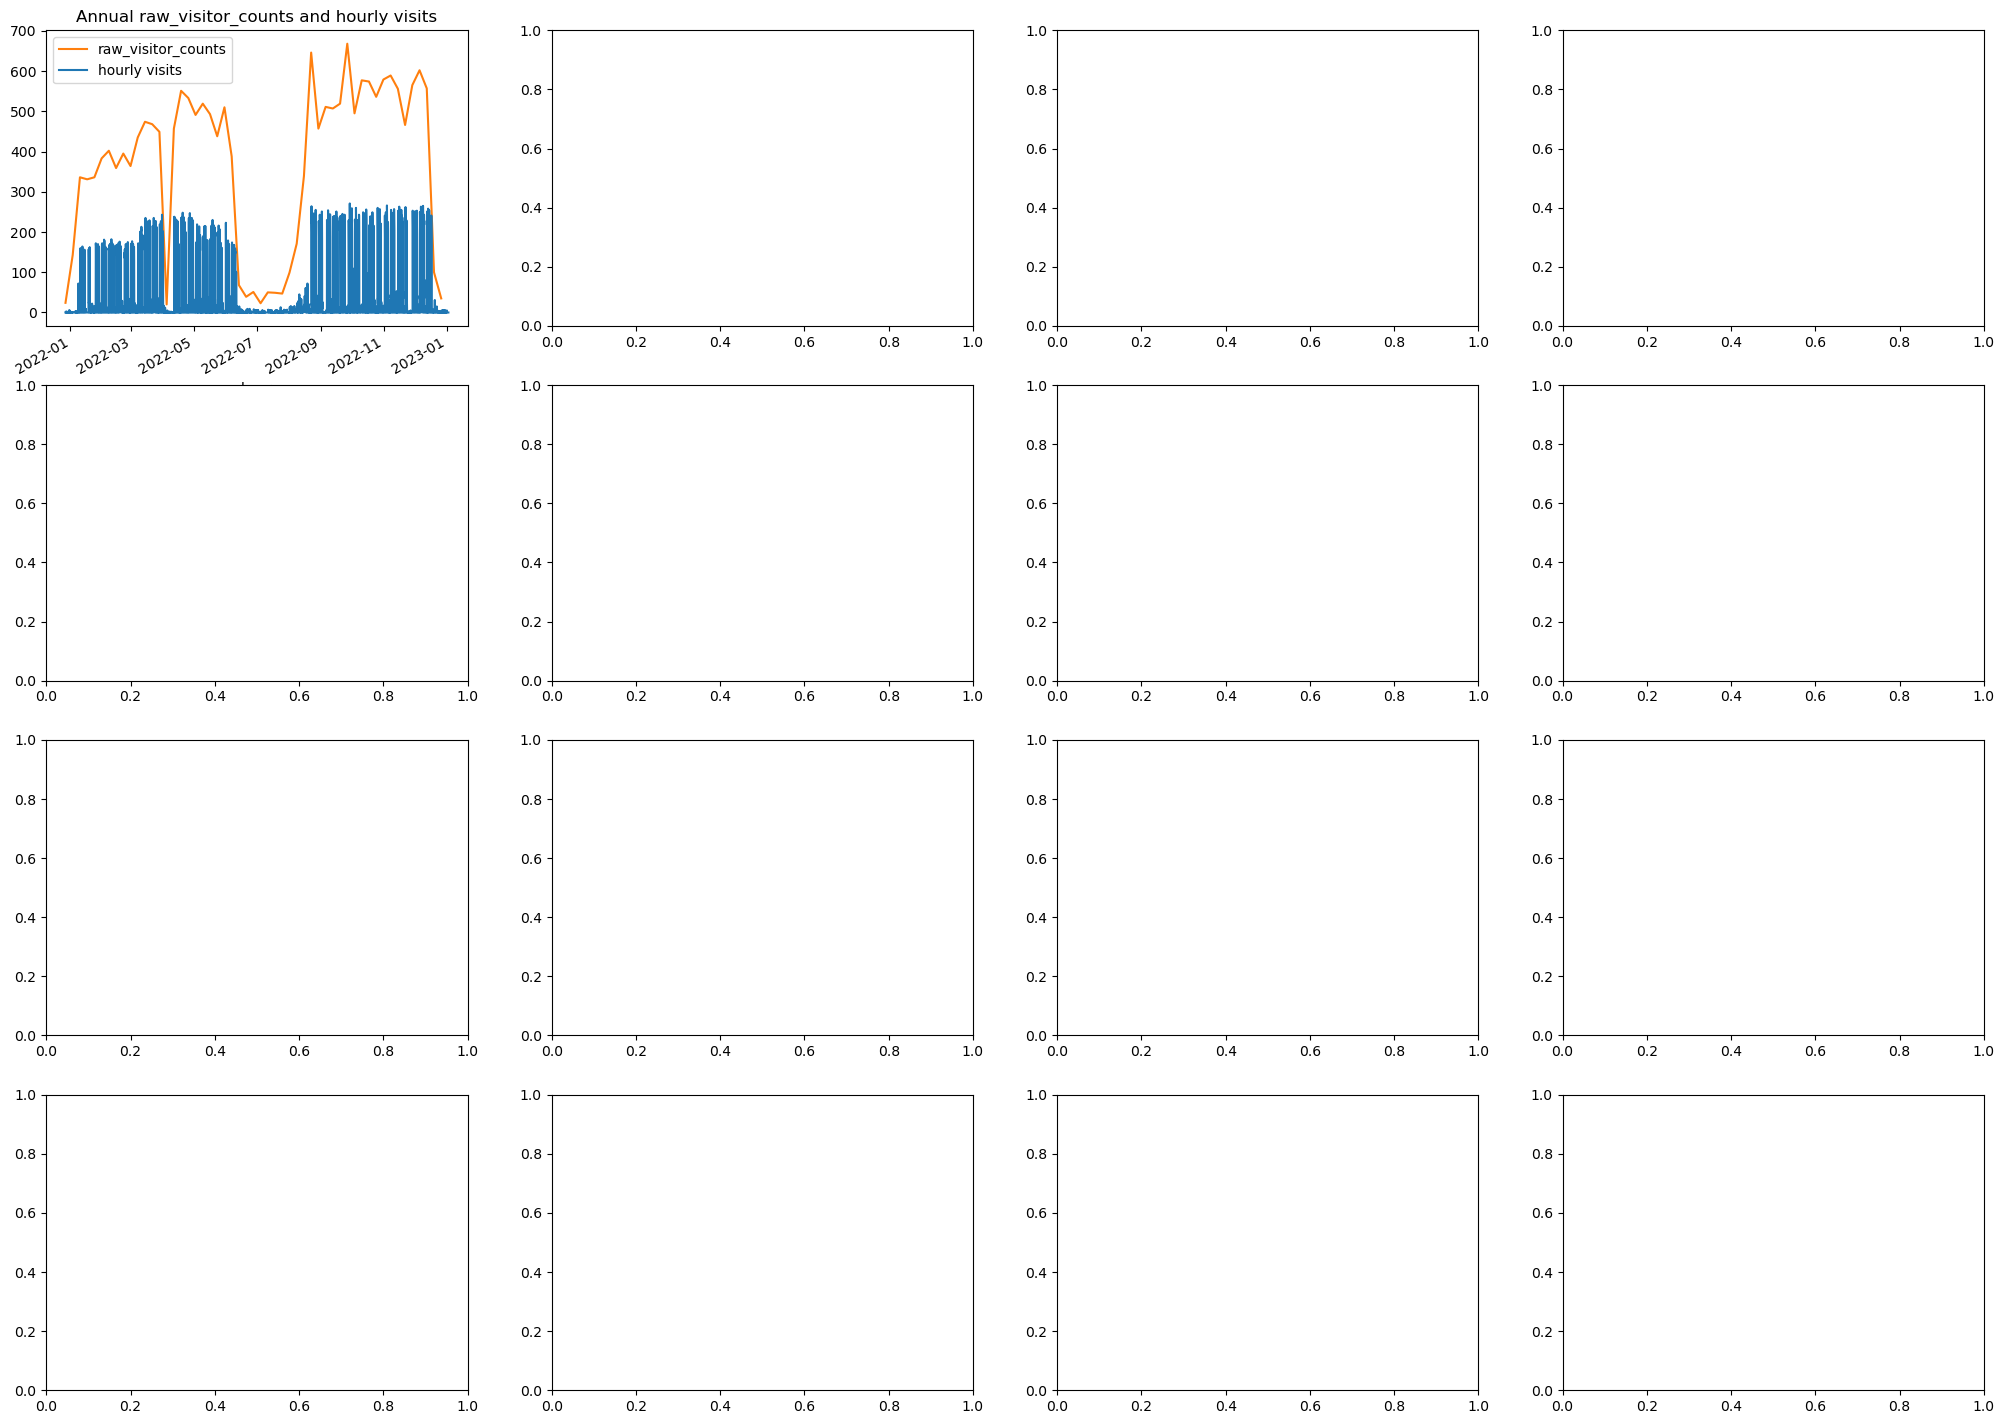

In [ ]:
from tqdm import tqdm
import json
import ast
import matplotlib.pyplot as plt

def get_hourly_visits_in_a_row(row):
    date_range_start = pd.to_datetime(row['date_range_start'])
    date_range_end = pd.to_datetime(row['date_range_end'])
    hour_list = pd.date_range(start=date_range_start, end=date_range_end, freq='h')[:-1] 
    visits_by_hour_str = row['visits_by_each_hour']
    visits_by_hour = ast.literal_eval(visits_by_hour_str)
    # print("school:", row['location_name'])
    hourly_df = pd.DataFrame({'hour': hour_list})
    hourly_df['visits'] = visits_by_hour
    return hourly_df

for placekey in tqdm(all_school_keys):
    placekey = random.choice(all_school_keys) # pick a random school
    con.execute(f"""
        SELECT *
        FROM highschools
        WHERE placekey = '{placekey}'
    """)
    school_df = con.fetchdf()
    school_df = school_df[school_df['visits_by_each_hour'].notna()]
    
    hourly_dfs = school_df.apply(get_hourly_visits_in_a_row, axis=1).to_list()
    school_hourly_df = pd.concat(hourly_dfs, ignore_index=True)
    school_hourly_df['placekey'] = placekey
    
    # fname = f"D:/Data/Advan/Weekly_Patterns/extracted_schools_2022/school_hourly_visits/{school}_hourly_visits.parquet"
    # school_df.to_parquet(fname)
    # break
    fig, ax = plt.subplots(figsize=(25,5))
    
    
    # ax.plot(school_hourly_df)
    
    # school_df['date_range_start'] = school_df['date_range_start'].dt.to_timestamp()
    school_df['date_range_start'] = pd.to_datetime(
    school_df['date_range_start'],
    errors='coerce',
    utc=True  # drop if you don’t want tz
)
    # school_df['date_range_start'] = school_df['date_range_start'].dt.to_timestamp()

    school_df.set_index('date_range_start')['raw_visitor_counts'].plot(ax=ax, color='tab:orange', label='raw_visitor_counts')
    school_hourly_df.set_index('hour')['visits'].plot(ax=ax, color='tab:blue', label='hourly visits')
    plt.legend()
    plt.show()
    break

school_df

# create a plot matrix (4 rows, 4 columns) for all months. 
# top row: annual raw_visitor_counts and hourly visits
# 2 - 4 rows: monthly raw_visitor_counts and hourly visits, one row for 4 months
import math
num_months = 12
fig, axs = plt.subplots(4, 4, figsize=(25, 20))
# top row: annual raw_visitor_counts and hourly visits
school_df.set_index('date_range_start')['raw_visitor_counts'].plot(ax=axs[0,0], color='tab:orange', label='raw_visitor_counts')
school_hourly_df.set_index('hour')['visits'].plot(ax=axs[0,0], color='tab:blue', label='hourly visits')
axs[0,0].set_title('Annual raw_visitor_counts and hourly visits')
axs[0,0].legend()

In [ ]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
# ! pip install natsort

In [ ]:
import pandas as pd
import os
from glob import glob
from natsort import natsorted
# import geopandas as gpd
from tqdm import tqdm

In [ ]:
weekly_csv_dir = r'D:\Data\Advan\Weekly_Patterns\extracted_schools_2022'

In [ ]:
# school_key_df

In [ ]:
school_enroll_fname = r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\highschool_school_placekey.csv"

school_enroll_df = pd.read_csv(school_enroll_fname).set_index('Placekey').fillna(0)
# school_placekeys = school_key_df['Placekey'].to_list()
school_enroll_df['total_middle_students'] = school_enroll_df['Students_6'] + school_enroll_df['Students_7'] + school_enroll_df['Students_8']
school_enroll_df['total_high_students'] = school_enroll_df['Students_9'] + school_enroll_df['Students_10'] + school_enroll_df['Students_11'] + school_enroll_df['Students_12']
school_enroll_df['total_teachers'] = school_enroll_df['Total_Students'] / school_enroll_df['Student_Teacher_Ratio']
school_enroll_df['total_phone'] =  school_enroll_df['Students_11'] + school_enroll_df['Students_12']  + school_enroll_df['Total_Students'] / school_enroll_df['Student_Teacher_Ratio']
school_enroll_df['total_people'] =  school_enroll_df['total_middle_students'] + school_enroll_df['total_high_students']  + school_enroll_df['Total_Students'] / school_enroll_df['Student_Teacher_Ratio']


high_school_enroll_df = school_enroll_df.query("total_phone > 200 ").query("total_middle_students < 50 ")
print("Loaded school placekeys:", len(school_enroll_df))
print("filtered high schools:", len(high_school_enroll_df))
school_enroll_df

C:\tmp\ipykernel_31624\3093054517.py:3: DtypeWarning: Columns (2,13,29,32,33,75,76,77,87,88,89,90,91,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  school_enroll_df = pd.read_csv(school_enroll_fname).set_index('Placekey').fillna(0)


Loaded school placekeys: 31531
filtered high schools: 11628


,Nces_Id,School_Level,School_District,School_Name,School_County,Phone,Address,City,State,Zip,...,TOP_CATEGORY,SUB_CATEGORY,LATITUDE_1,LONGITUDE_1,NAICS_CODE,total_middle_students,total_high_students,total_teachers,total_phone,total_people
Placekey,,,,,,,,,,,,,,,,,,,,,
zzw-222@8gm-ms3-pn5,1.000050e+10,Secondary,Albertville City School District,Albertville High School,Marshall County,(256) 894-5000,402 E McCord Ave,Albertville,AL,35950,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.263627,-86.206532,611110,0.0,1710.0,90.957447,862.957447,1800.957447
222-222@8gm-mzc-rkz,1.000060e+10,Combined or Ungraded,Marshall County School District,Asbury High School,Marshall County,(256) 878-4068,1990 Asbury Rd,Albertville,AL,35951,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.362410,-86.141655,611110,285.0,365.0,36.312849,198.312849,686.312849
zzy-223@8gm-n94-8jv,1.000060e+10,Secondary,Marshall County School District,Douglas High School,Marshall County,(256) 593-2810,225 Eagle Drive,Douglas,AL,35964,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.178134,-86.319927,611110,0.0,691.0,33.707317,349.707317,724.707317
222-224@8gm-nwk-gkz,1.000060e+10,Secondary,Marshall County School District,Kate D Smith Dar High School,Marshall County,(256) 728-4238,6077 Main St,Grant,AL,35747,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.533644,-86.254083,611110,0.0,397.0,23.491124,220.491124,420.491124
zzw-222@8gm-p3m-z9f,1.000060e+10,Combined or Ungraded,Marshall County School District,Brindlee Mountain High School,Marshall County,(256) 753-2800,994 Scant City Road,Guntersville,AL,35976,...,Elementary and Secondary Schools,Elementary and Secondary Schools,34.376460,-86.421873,611110,213.0,302.0,34.105960,166.105960,549.105960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzw-222@5z8-f95-3qz,0.000000e+00,Combined or Ungraded,0,Coastal Christian School,San Luis Obispo County,(805) 489-1213,1005 Oak Park Blvd,Pismo Beach,CA,93449,...,Elementary and Secondary Schools,Elementary and Secondary Schools,35.137682,-120.605958,611110,77.0,73.0,20.470588,49.470588,170.470588
223-223@8t2-fkh-fj9,0.000000e+00,Combined or Ungraded,0,Hyde Park School,Travis County,(512) 465-8338,3901 Speedway Dr,Austin,TX,78751,...,Elementary and Secondary Schools,Elementary and Secondary Schools,30.302155,-97.731914,611110,211.0,280.0,84.111111,221.111111,575.111111
223-223@5py-nkk-hnq,0.000000e+00,Combined or Ungraded,0,Sayre School,Fayette County,(859) 254-1361,194 N Limestone,Lexington,KY,40507,...,Elementary and Secondary Schools,Elementary and Secondary Schools,38.047527,-84.493717,611110,104.0,252.0,75.750000,203.750000,431.750000


In [ ]:
# school_key_df

In [ ]:
all_files = glob(os.path.join(weekly_csv_dir, '*.csv.gz'))
all_files = natsorted(all_files)
print(f"Found {len(all_files)} weekly pattern files.")

# pick aup random file
import random
random_file = random.choice(all_files[2000:])

# pick a random school placekey
df = pd.read_csv(random_file)
mask = df['location_name'].str.contains('high', case=False, na=False)
df = df[mask]
df

Found 25201 weekly pattern files.


,placekey,parent_placekey,safegraph_brand_ids,location_name,brands,store_id,top_category,sub_category,naics_code,latitude,...,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,normalized_visits_by_total_visits,normalized_visits_by_total_visitors
2,zzw-222@8gh-5bz-ht9,NaN,NaN,W J Keenan High,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,34.100473,...,371.0,"{ ""<5"":56, ""5-20"":12, ""21-60"":12, ""61-240"":62,...","{""Shell Oil"":36,""Western Union"":25,""Chick-fil-...","{""Western Union"":68,""Shell Oil"":58,""Walmart"":3...","{""ios"":73,""android"":62}",4877.0,0.005543,0.006225,0.000036,0.000866
3,222-222@5ph-y49-dy9,NaN,NaN,Freeburg Community High Sch,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,38.423027,...,308.0,"{ ""<5"":109, ""5-20"":11, ""21-60"":36, ""61-240"":19...","{""Dollar General"":43,""McDonald's"":37,""Western ...","{""Western Union"":93,""Dollar General"":87,""McDon...","{""ios"":184,""android"":67}",10515.0,0.004105,0.005112,0.000045,0.001100
6,zzw-222@5ny-s4k-mp9,NaN,NaN,Mount Ayr High School,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,40.716891,...,366.0,"{ ""<5"":74, ""5-20"":12, ""21-60"":31, ""61-240"":110...","{""Western Union"":20,""Hy-Vee"":19,""Casey's Gener...","{""Western Union"":88,""Casey's General Stores"":6...","{""ios"":148,""android"":58}",7189.0,0.007958,0.011175,0.000117,0.002143
14,222-222@63v-ccy-v2k,NaN,NaN,Firestone High School,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,41.118566,...,367.0,"{ ""<5"":90, ""5-20"":11, ""21-60"":40, ""61-240"":137...","{""Circle K"":35,""Starbucks"":35,""McDonald's"":33,...","{""Western Union"":90,""Starbucks"":88,""Circle K"":...","{""ios"":205,""android"":101}",10817.0,0.005501,0.007177,0.000052,0.001124
18,zzw-222@63f-dk6-qj9,NaN,NaN,Brookville High,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,37.346005,...,360.0,"{ ""<5"":160, ""5-20"":26, ""21-60"":54, ""61-240"":25...","{""Western Union"":101,""Walmart"":59,""McDonald's""...","{""Western Union"":193,""Walmart"":128,""Sheetz"":12...","{""ios"":275,""android"":95}",16978.0,0.017149,0.020903,0.000102,0.002646
22,224-222@63j-b6w-bx5,NaN,NaN,Bishop Brossart High School,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,38.960856,...,332.0,"{ ""<5"":170, ""5-20"":43, ""21-60"":16, ""61-240"":10...","{""Speedway"":77,""Western Union"":67,""Walmart"":54...","{""Western Union"":134,""Speedway"":124,""Walmart"":...","{""ios"":169,""android"":59}",8544.0,0.017061,0.021463,0.000062,0.001861
24,zzw-222@8dy-pkq-jqf,NaN,NaN,Destrehan High School,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,29.965090,...,267.0,"{ ""<5"":206, ""5-20"":14, ""21-60"":118, ""61-240"":4...","{""Shell Oil"":138,""Western Union"":82,""RaceTrac""...","{""Shell Oil"":207,""Western Union"":164,""RaceTrac...","{""ios"":363,""android"":78}",22116.0,0.025028,0.027529,0.000154,0.004368
28,zzw-222@5r5-7q6-yqf,NaN,NaN,Buhler High,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,38.140768,...,373.0,"{ ""<5"":70, ""5-20"":8, ""21-60"":27, ""61-240"":121,...","{""Western Union"":67,""Kwik Shop"":48,""Dillons Su...","{""Western Union"":145,""Kwik Shop"":99,""Walmart"":...","{""ios"":142,""android"":84}",10093.0,0.015006,0.018109,0.000249,0.003296
30,222-222@5p9-wyp-hyv,NaN,NaN,Alta Aurelia High School School,NaN,NaN,Elementary and Secondary Schools,Elementary and Secondary Schools,611110,42.664357,...,391.0,"{ ""<5"":49, ""5-20"":5, ""21-60"":38, ""61-240"":139,...","{""Western Union"":59,""Walmart"":52,""Walmart Visi...","{""Western Union"":122,""Walmart"":109,""Walmart Au...","{""ios"":181,""android"":52}",8316.0,

In [ ]:
# hour_list
# pd.date_range(start=date_range_start, end=date_range_end, freq='h')[:-1]
# date_range_start
# row['placekey']
df.columns

Index(['placekey', 'parent_placekey', 'safegraph_brand_ids', 'location_name',
       'brands', 'store_id', 'top_category', 'sub_category', 'naics_code',
       'latitude', 'longitude', 'street_address', 'city', 'region',
       'postal_code', 'open_hours', 'category_tags', 'opened_on', 'closed_on',
       'tracking_closed_since', 'websites', 'geometry_type', 'polygon_wkt',
       'polygon_class', 'enclosed', 'phone_number', 'is_synthetic',
       'includes_parking_lot', 'iso_country_code', 'wkt_area_sq_meters',
       'date_range_start', 'date_range_end', 'raw_visit_counts',
       'raw_visitor_counts', 'visits_by_day', 'visits_by_each_hour', 'poi_cbg',
       'visitor_home_cbgs', 'visitor_home_aggregation', 'visitor_daytime_cbgs',
       'visitor_country_of_origin', 'distance_from_home', 'median_dwell',
       'bucketed_dwell_times', 'related_same_day_brand',
       'related_same_week_brand', 'device_type',
       'normalized_visits_by_state_scaling',
       'normalized_visits_by_regi

school: Andover High
Estimated Total People: 1778, Estimated Total Phone: 949, Total Teachers: 128
Total middle school students: 0.0 Total high school students: 1650.0


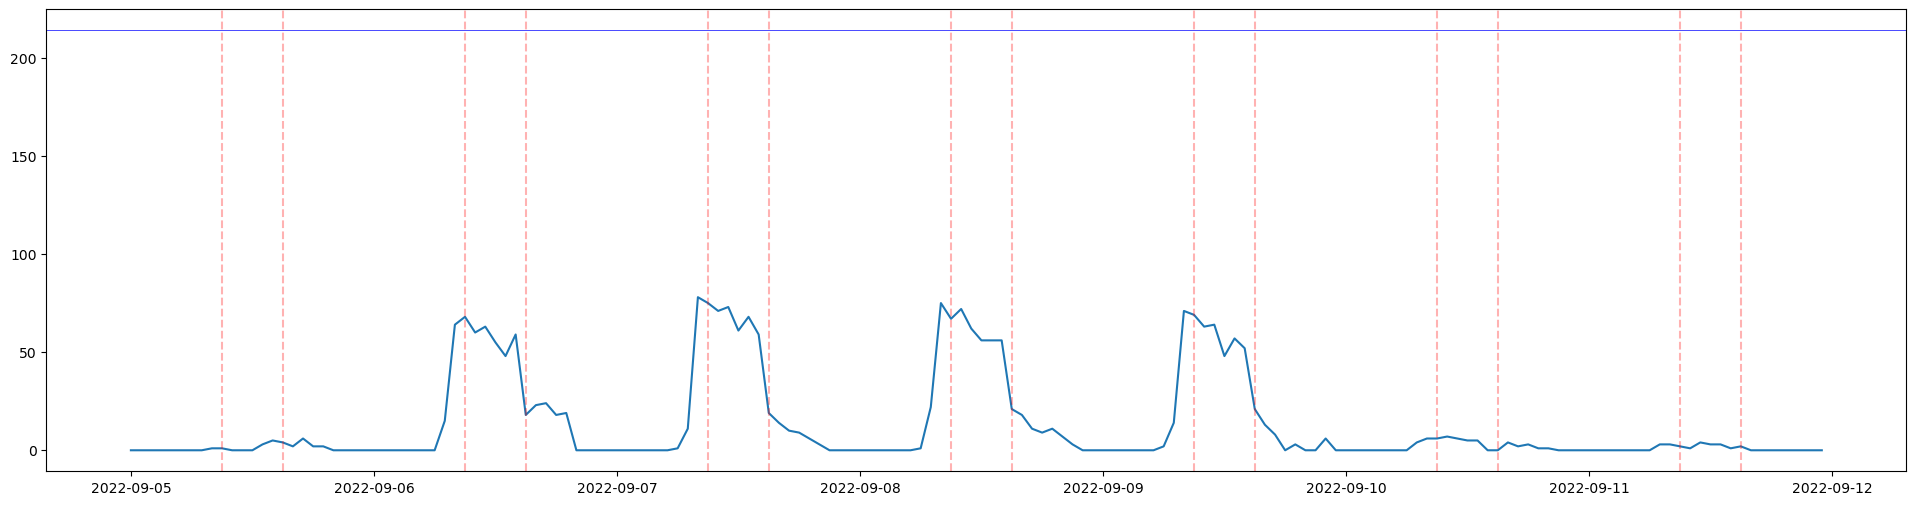

In [ ]:
# creat a hour list from "date_range_start" column to "date_range_end" column
date_range_start = pd.to_datetime(df['date_range_start'].iloc[0])
date_range_end = pd.to_datetime(df['date_range_end'].iloc[0])
hour_list = pd.date_range(start=date_range_start, end=date_range_end, freq='h')[:-1] 

# create a hourly df
import json
import ast
import matplotlib.pyplot as plt

for idx, row in df.sample(1).iterrows():
    visits_by_hour_str = row['visits_by_each_hour']
    visits_by_hour = ast.literal_eval(visits_by_hour_str)
    print("school:", row['location_name'])
    hourly_df = pd.DataFrame({'hour': hour_list})
    hourly_df['visits'] = visits_by_hour
    # hourly_df.set_index('hour', inplace=True)

    # hourly_df = hourly_df.iloc[:24]

    # plot the hourly df
    fig, ax = plt.subplots(figsize=(24, 6))
    ax.plot(hourly_df['hour'], hourly_df['visits'] )
    total_people = school_enroll_df.loc[row['placekey'], 'total_people']
    total_phone = school_enroll_df.loc[row['placekey'], 'total_phone']
    total_teachers = school_enroll_df.loc[row['placekey'], 'total_teachers']
    # ax.set_title(f"School: {row['location_name']}\nEstimated Total People
    print(f"Estimated Total People: {total_people:.0f}, Estimated Total Phone: {total_phone:.0f}, Total Teachers: {total_teachers:.0f}")
    print("Total middle school students:", school_enroll_df.loc[row['placekey'], 'total_middle_students']
          , "Total high school students:", school_enroll_df.loc[row['placekey'], 'total_high_students'])
    
    # ax.axhline(y=total_phone, color='red', linewidth=0.5)
    # ax.axhline(y=total_people, color='black', linewidth=0.5)
    # ax.axhline(y=row['normalized_visits_by_state_scaling']/5, color='green', linewidth=0.5)
    ax.axhline(y=row['raw_visitor_counts'], color='blue', linewidth=0.5)

    # show the 9 am vertical line
    for day in pd.date_range(start=hourly_df['hour'].min().normalize(), end=hourly_df['hour'].max().normalize(), freq='D'):  # note the .normalize() to get midnight, not date()
        ax.axvline(x=day + pd.Timedelta(hours=9), color='red', linestyle='--', alpha=0.3)
        ax.axvline(x=day + pd.Timedelta(hours=15), color='red', linestyle='--', alpha=0.3)
        # ax.axvline(x=day + pd.Timedelta(hours=12), linestyle='--', alpha=0.3)
        # ax.axvline(x=day + pd.Timedelta(hours=18), color='orange', linestyle='--', alpha=0.3)

    break

# hourly_df
# 

In [ ]:
hourly_df

,hour,visits
0,2022-01-24 00:00:00-08:00,0
1,2022-01-24 01:00:00-08:00,0
2,2022-01-24 02:00:00-08:00,0
3,2022-01-24 03:00:00-08:00,0
4,2022-01-24 04:00:00-08:00,0
...,...,...
163,2022-01-30 19:00:00-08:00,0
164,2022-01-30 20:00:00-08:00,0
165,2022-01-30 21:00:00-08:00,0
166,2022-01-30 22:00:00-08:00,0


In [ ]:
day + pd.Timedelta(hours=9)

Timestamp('2022-01-30 09:00:00')